In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# # to get rid of the warnings
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

# plt.rcParams["figure.figsize"] = (10,6)
# sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,0.0908,-0.5516,-0.6178,-0.9914,-0.3112,1.4682,-0.4704,0.2080,0.0258,0.4040,0.2514,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,-0.1670,1.6127,1.0652,0.4891,-0.1438,0.6356,0.4639,-0.1148,-0.1834,-0.1458,-0.0691,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,0.2076,0.6245,0.0661,0.7173,-0.1659,2.3459,-2.8901,1.1100,-0.1214,-2.2619,0.5250,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,-0.0550,-0.2265,0.1782,0.5078,-0.2879,-0.6314,-1.0596,-0.6841,1.9658,-1.2326,-0.2080,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,0.7531,-0.8228,0.5382,1.3459,-1.1197,0.1751,-0.4514,-0.2370,-0.0382,0.8035,0.4085,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0000,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,7.3053,1.9144,4.3562,-1.5931,2.7119,-0.6893,4.6269,-0.9245,1.1076,1.9917,0.5106,-0.6829,1.4758,0.2135,0.1119,1.0145,-0.5093,1.4368,0.2500,0.9437,0.8237,0.7700,0
284803,172787.0000,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.2949,0.5848,-0.9759,-0.1502,0.9158,1.2148,-0.6751,1.1649,-0.7118,-0.0257,-1.2212,-1.5456,0.0596,0.2142,0.9244,0.0125,-1.0162,-0.6066,-0.3953,0.0685,-0.0535,24.7900,0
284804,172788.0000,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.7084,0.4325,-0.4848,0.4116,0.0631,-0.1837,-0.5106,1.3293,0.1407,0.3135,0.3957,-0.5773,0.0014,0.2320,0.5782,-0.0375,0.6401,0.2657,-0.0874,0.0045,-0.0266,67.8800,0
284805,172788.0000,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.6791,0.3921,-0.3991,-1.9338,-0.9629,-1.0421,0.4496,1.9626,-0.6086,0.5099,1.1140,2.8978,0.1274,0.2652,0.8000,-0.1633,0.1232,-0.5692,0.5467,0.1088,0.1045,10.0000,0


            Select a Metric
            Spot Check Algorithms
            Spot Check Imbalanced Algorithms
            Hyperparameter Tuning

## İyi performans gösteren algoritmaların hiper parametrelerini ayarlamak da hala önemlidir. Bu, özellikle dengesiz sınıflandırma için tasarlanmış modellerin hiper parametrelerini içerir.

### Bir metrik seçmek, projedeki en önemli adım olabilir. Metrik, tüm modellerin değerlendirildiği ve karşılaştırıldığı ölçüm çubuğudur.Yanlış metrik seçimi, yanlış algoritmanın seçilmesi anlamına gelebilir.

## İlk olarak, olasılıkları mı yoksa net sınıf etiketlerini mi tahmin etmek istediğinize karar vermelisiniz.Olasılıklar, tahminin belirsizliğini yakalarken, net sınıf etiketleri hemen kullanılabilir.

# Olasılıklar: Her örnek için sınıf üyeliği olasılığını tahmin edin.
# Sınıf Etiketleri: Her örnek için net bir sınıf etiketi tahmin edin.

### Predict Probabilities : Olasılıkların doğrudan kullanılması amaçlanıyorsa, Brier Puanı ve Brier Beceri puanı iyi bir ölçü olabilir.Alternatif olarak, olasılıkları tahmin etmek ve kullanıcının bunları, kullanıcı tarafından seçilen bir eşik aracılığıyla net sınıf etiketleriyle eşleştirmesine izin vermek isteyebilirsiniz.Bu durumda, olası eşikler aralığında modelin performansını özetleyen bir ölçü seçilebilir.


# Pozitif sınıf en önemli ise, o zaman precision-recall curve ve eğri altındaki alan (PR AUC) kullanılabilir. Bu, tüm eşiklerde hem precision hem de -recall optimize edecektir.


## Alternatif olarak, her iki sınıf da eşit derecede önemliyse, ROC Eğrisi ve eğri altındaki alan (ROC AUC) kullanılabilir. Bu, gerçek pozitif oranı en üst düzeye çıkaracak ve yanlış pozitif oranı en aza indirecektir.

## Predict Class Labels :


## Pozitif sınıf daha önemliyse, precision and recall. optimize eden F-Measure varyasyonları kullanılabilir.



# Hem FP hem de FN eşit derecede önemliyse, F1 kullanılabilir. FN daha maliyetliyse, F2-Measure kullanılabilir, aksi takdirde FP daha maliyetliyse, F0.5-Ölçü kullanılabilir.


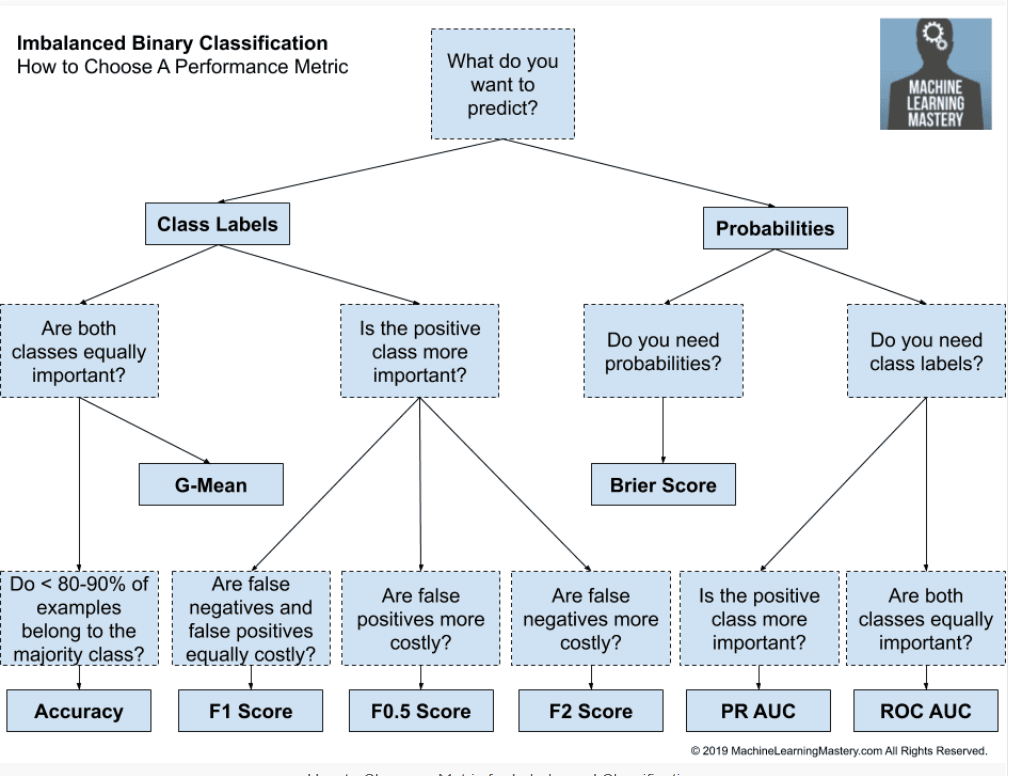

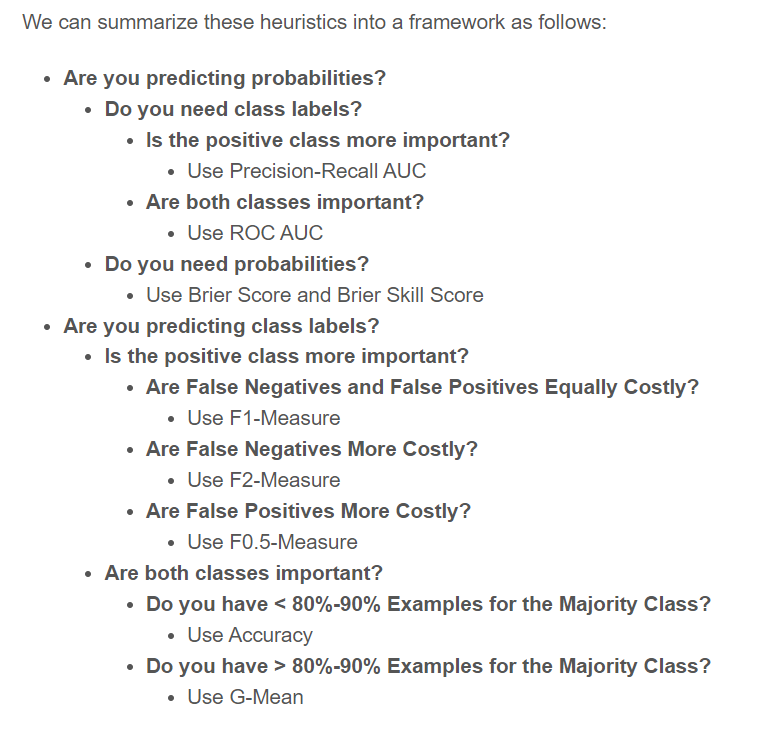

## YA F2 SCORE'A GİDECEĞİZ YA DA F1 *********

### Spot Check Algorithms : minimum hiperparametre ayarıyla bir dizi farklı algoritma paketini değerlendirmek anlamına gelir.Amaç, bir dizi standart makine öğrenimi algoritmasını hızlı bir şekilde test etmek ve yetenekli olarak kabul edilmek için dengesiz sınıflandırma için uzmanlaşmış tekniklerin karşılaştırılması ve daha iyi performans göstermesi gereken performansta bir temel sağlamaktır.

## algorithms to spot check:


            Naive Algorithms
            Linear Algorithms
            Nonlinear Algorithms
            Ensemble Algorithms

## dört tür dengesiz sınıflandırma tekniği vardır :

                Data Sampling Algorithms
                Cost-Sensitive Algorithms
                One-Class Algorithms
                Probability Tuning Algorithms   ( Olasılık Ayarlama Algoritmaları )

## Data Sampling Algorithms :


### Veri örnekleme algoritmaları, dengesiz bir sınıflandırma probleminde standart bir makine öğrenimi algoritmasının performansını iyileştirmek için eğitim veri kümesinin bileşimini değiştirir.


            Data Oversamplinug.
            Data Undersampling.
            Combined Oversampling and Undersampling.

Data oversampling , azınlık sınıfının örneklerinin çoğaltılmasını veya azınlık sınıfından mevcut örneklerden yeni örneklerin sentezlenmesini içerir. (SMOTE ) GİBİ. BURADA Belki de ayarlanması gereken en önemli hiperparametre, gerçekleştirilecek  oversampling miktarıdır.


####  data oversampling methods : 

                            Random Oversampling
                            SMOTE   ve smote çeşitleri


Undersampling hangi örneklerin silineceğini dikkatlice seçmek için rastgele veya bir algoritma kullanmak gibi çoğunluk sınıfından örneklerin silinmesini içerir.

#### data undersampling methods  :


                        Random Undersampling
                        Condensed Nearest Neighbor
                        Tomek Links

##### popular combinations of over and undersampling  :

                    SMOTE and Random Undersampling
                    SMOTE and Tomek Links

# Data sampling algorithms ,makine öğrenme algoritması seçimine bağlı olarak farklı performans gösterebilir.

Ek olarak, çoğu veri örnekleme algoritması dahili olarak k-en yakın komşu algoritmasını kullanır.

#  Cost-Sensitive Algorithms :

## Maliyete duyarlı algoritmalar, modeli eğitim veri kümesine yerleştirirken yanlış sınıflandırmanın farklı maliyetlerini hesaba katmak için tasarlanmış makine öğrenimi algoritmalarının değiştirilmiş sürümleridir.




## Bu algoritmalar, yanlış sınıflandırma maliyetinin eğitim veri kümesindeki örneklerin dağılımıyla ters orantılı olacak şekilde yapılandırıldığı dengesiz sınıflandırmada kullanıldığında etkili olabilir.





## Maliyete duyarlı eğitim kullanılarak yapılandırılabilen bazı makine öğrenimi algoritması örnekleri şunlardır:



                            Logistic Regression
                            Decision Trees
                            Support Vector Machines
                            Artificial Neural Networks
                            Bagged Decision Trees
                            Random Forest

# One-Class Algorithms :Aykırı değer tespiti ve anormallik tespiti için kullanılan algoritmalar, sınıflandırma görevleri için kullanılabilir.Alışılmadık olmasına rağmen, bu şekilde kullanıldıklarında genellikle tek sınıf sınıflandırma algoritmaları olarak adlandırılırlar.


# Bazı durumlarda, örneğin çok az sayıda pozitif sınıf örneği ile ciddi bir sınıf dengesizliği olduğunda olduğu gibi, tek sınıf sınıflandırma algoritmaları çok etkili olabilir. 




# Denenecek tek sınıflı sınıflandırma algoritmalarına örnekler:


                        One-Class Support Vector Machines
                        Isolation Forests
                        Minimum Covariance Determinant
                        Local Outlier Factor

# Probability Tuning Algorithms : 

## Öngörülen olasılıklar iki şekilde geliştirilebilir; bunlar: 
## 1 -) Olasılıkları Kalibre Etme.










## 2 -) Sınıflandırma Eşiğinin Ayarlanması.(Tuning the Classification Threshold.):


### Bazı algoritmalar, daha sonra net sınıf etiketleriyle eşlenmesi gereken olasılıkları safça tahmin etmek için tasarlanmıştır.
                        Logistic Regression
                        Linear Discriminant Analysis
                        Naive Bayes
                        Artificial Neural Networks
                        
### Olasılıklar, bir eşik olasılık değeri kullanılarak sınıf etiketlerine eşlenir.Eşiğin altındaki tüm olasılıklar, sınıf 0'a eşlenir ve eşiğe eşit veya üzerindeki tüm olasılıklar, sınıf 1'e eşlenir.Varsayılan eşik 0,5'tir, ancak sınıf etiketlerini ve dolayısıyla olasılıkları doğal olarak tahmin eden bir makine öğrenimi modelinin performansını önemli ölçüde etkileyecek farklı eşikler kullanılabilir.Bu nedenle, bir olasılığı doğal olarak tahmin eden olasılıklı algoritmalar kullanılıyorsa ve çıktı olarak sınıf etiketleri gerekliyse veya modelleri değerlendirmek için kullanılıyorsa, sınıflandırma eşiğini ayarlamayı denemek iyi bir fikirdir.

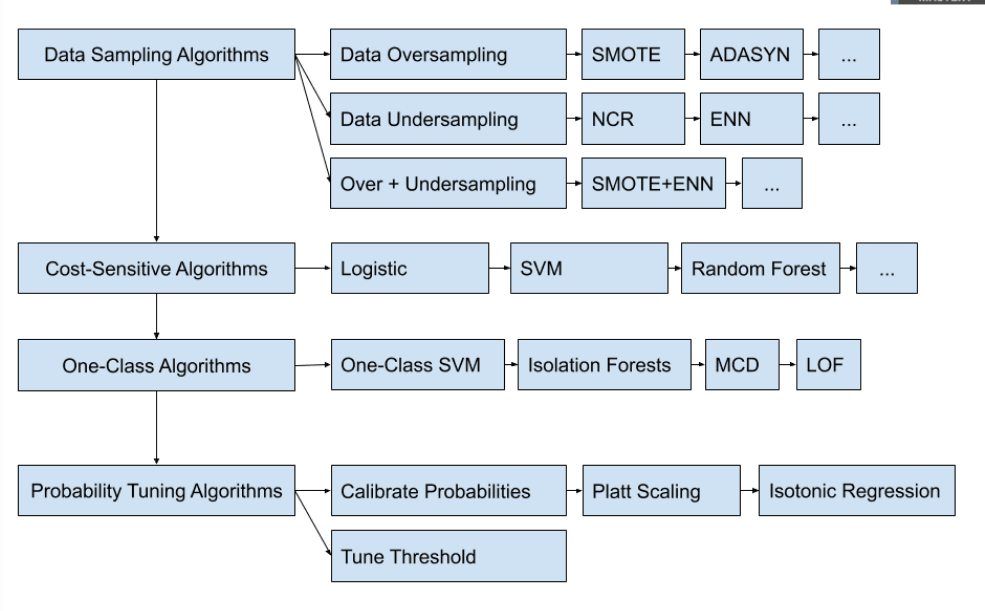